In [1]:
import numpy as np
import matplotlib.pyplot as plt
from model import Model
from activation import Identity

In [2]:
x = np.linspace(-2, 2, 1000)
y = np.sin(x**2)

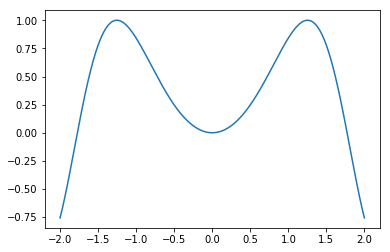

In [3]:
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

In [4]:
m = Model(learning_rate=.001).layer(1).layer(20).layer(20).layer(1, act=Identity)

In [5]:
x_shuffled = np.random.choice(np.linspace(-2,2,10000000), 2000000)
y_shuffled = np.sin(x_shuffled**2)

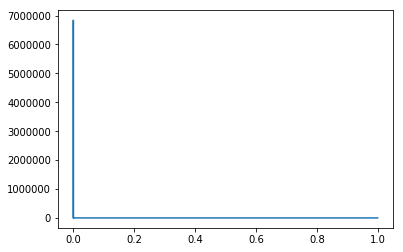

In [6]:
cost = []
for i in range(0, 2000000, 100):
    j = min(2000000, i+100)
    xx = np.array([x_shuffled[i:j]])
    yy = np.array([y_shuffled[i:j]])
    m.inference(xx)
    cost.append(m.get_cost(yy))
    m.back_prop(yy)
fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,len(cost)), np.array(cost))
plt.show()

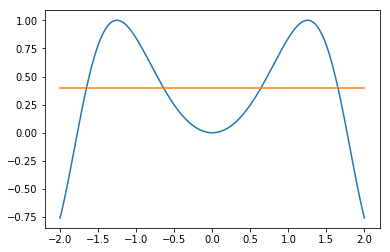

In [7]:
y_prime = m.inference(x[np.newaxis, :])[0]
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, y_prime)
plt.show()